In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("insurance.txt",sep = ",")
df.drop(['children'],axis = 1,inplace = True)

PREPROCESSING

In [ ]:
df = df.sample(frac=1, random_state=400)
df = df.reset_index(drop = True)

In [ ]:
X = np.array(df.drop(['charges'], axis = 1))

In [ ]:
poly_features = []
for i in range(10):
  poly = PolynomialFeatures(i+1)
  data = poly.fit_transform(X)
  poly_features.append(np.array(data))
  

In [ ]:
def standardize(x,u,sigma):
  return (x-u)/sigma

In [ ]:
def preprocess(df):
  for i,col in enumerate(df.T):
      mean = col.mean()
      std = col.std()
      col = standardize(col,mean,std)
      df[:,i] = col
  df[:, 0] =  1    
  return df   

In [ ]:
for i in range(10):
  poly_features[i] = preprocess(poly_features[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [ ]:
#standardizing target
mean_charges = df.mean()['charges']
charges_variance = df.std()['charges']
df['charges']  = df['charges'].apply(lambda x : standardize(x,mean_charges,charges_variance)) 
y = np.array((df['charges'])).reshape(len(df),1)

In [ ]:
train_size = int(0.7*len(df))
val_size = int(0.2*len(df))
y_train = y[:train_size]
y_val =  y[train_size:train_size+val_size]
y_test = y[train_size+val_size:]

FUNCTIONS

In [ ]:
def cost_function(w,X,y):
  return (np.sum((np.dot(X,w) - y)**2))/2

In [ ]:
def stochastic_gradient_descent(w,X,y,alpha,printError,reg,lamda):
  error = []
  for i in range(10):
    for j in range(len(X)):
      if printError == True:
        if j%1000 == 0:
          print(cost_function(w,X,y))
      item = X[j]
      output = y[j]
      if j%50 == 0:
        error.append(cost_function(w,X,y))
      A = (item.transpose()).reshape(w.shape[0],1)
      B = (item.dot(w) - output).reshape(1,1)
      #if reg == "noreg":
      if reg == "noreg":
        dw = A.dot(B) 
      elif reg == "lasso":
        dw = A.dot(B) + (lamda*np.sign(w))*(1/len(X))
        dw[0] = dw[0] - (lamda*np.sign(w[0]))*(1/len(X))
      elif reg == "ridge":
        dw = A.dot(B) + (lamda*2*w)*(1/len(X))
        dw[0] = dw[0] - (lamda*2*w[0])/len(X)
      w = w - (alpha*dw)
  return w,error


In [ ]:
def predict(parameters,X_test):
  return np.dot(X_test,parameters)

In [ ]:
def RMSE(y_true,y_pred):
  return np.sqrt(((y_true - y_pred) ** 2).mean())

POLYNOMIAL REGRESSION WITHOUT REGULARIZATION

In [ ]:
weight_list_without_reg = []
train_errors = []
val_errors = []
test_errors = []
train_RMSE = []
val_RMSE = []
test_RMSE = []

for i in range(10):
  w = np.zeros((poly_features[i].shape[1],1))
  X_train = poly_features[i][:train_size]
  X_val = poly_features[i][train_size:train_size+val_size]
  X_test = poly_features[i][train_size + val_size:]
  print("POLYNOMIAL WITH DEGREE {}".format(i+1))
  print("Training error every 1000 iterations: ")
  weights,error = stochastic_gradient_descent(w,X_train,y_train,0.0001,printError = True,reg = "noreg",lamda = 0)
  train_errors.append(cost_function(weights,X_train,y_train))
  val_errors.append(cost_function(weights,X_val,y_val))
  test_errors.append(cost_function(weights,X_test,y_test))

  y_train_pred = predict(weights,X_train)
  y_val_pred = predict(weights,X_val)
  y_test_pred = predict(weights,X_test)

  train_RMSE.append(RMSE(y_train,y_train_pred))
  val_RMSE.append(RMSE(y_val,y_val_pred))
  test_RMSE.append(RMSE(y_test,y_test_pred))
  print("")
  weight_list_without_reg.append(weights)

POLYNOMIAL WITH DEGREE 1
Training error every 1000 iterations: 
468.9035010093503
459.6513377207056
452.13188979821604
446.0194802522905
441.04981897668466
437.00840596685146
433.72112926348257
431.04664165813995
428.8701791282833
427.09854790755384

POLYNOMIAL WITH DEGREE 2
Training error every 1000 iterations: 
468.9035010093503
446.5172690367182
434.1613052938295
427.3251955524965
423.53081415384554
421.4155094743796
420.2291915586191
419.5583794138411
419.17472258685837
418.95180631520094

POLYNOMIAL WITH DEGREE 3
Training error every 1000 iterations: 
468.9035010093503
435.2091429740751
424.2411203918249
420.57775244022287
419.2969573728497
418.8124932644148
418.6046307581697
418.49837291600454
418.4322480004764
418.38332627038983

POLYNOMIAL WITH DEGREE 4
Training error every 1000 iterations: 
468.9035010093503
427.9272938387197
420.74209818474924
419.252080514965
418.82492295456063
418.63568330001686
418.51352540698656
418.4144529499597
418.3245202958677
418.23871571893994

POLY

In [ ]:
for i in range(10):
  print("For model with degree {}:".format(i+1))
  print("Train Sum of squares of error = {}".format(train_errors[i]))
  print("Validation Sum of squares of error = {}".format(val_errors[i]))
  print("test Sum of squares of error = {}".format(test_errors[i]))
  print("Train RMSE = {}".format(train_RMSE[i]))
  print("Validation RMSE = {}".format(val_RMSE[i]))
  print("test RMSE = {}".format(test_RMSE[i]))
  print(" ")

For model with degree 1:
Train Sum of squares of error = 425.65605889366554
Validation Sum of squares of error = 126.97191229811227
test Sum of squares of error = 49.60628151626601
Train RMSE = 0.953688362811738
Validation RMSE = 0.9752437985716835
test RMSE = 0.8572676794998467
 
For model with degree 2:
Train Sum of squares of error = 418.8194274356599
Validation Sum of squares of error = 125.0999308981278
test Sum of squares of error = 47.634618780705935
Train RMSE = 0.9459985763659757
Validation RMSE = 0.968027961408333
test RMSE = 0.8400583646452539
 
For model with degree 3:
Train Sum of squares of error = 418.3423882108111
Validation Sum of squares of error = 125.79665897786367
test Sum of squares of error = 48.07209786797678
Train RMSE = 0.9454596722776929
Validation RMSE = 0.9707198725663514
test RMSE = 0.84390712028856
 
For model with degree 4:
Train Sum of squares of error = 418.15516564383324
Validation Sum of squares of error = 126.67788080212767
test Sum of squares of er

OVERFITTING VISUALIZATION

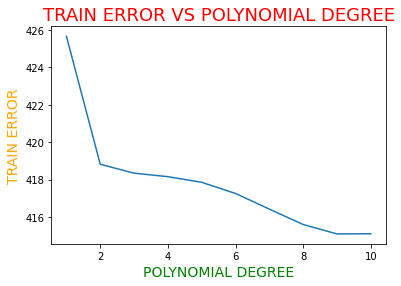

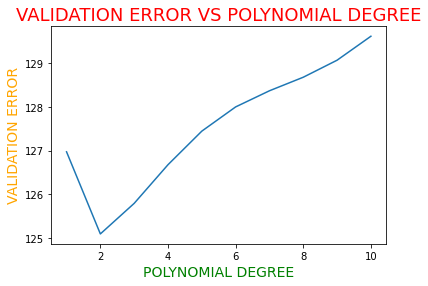

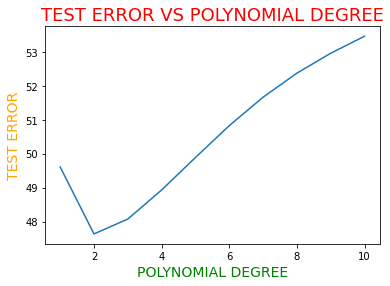

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.subplot()
plt.plot(x,train_errors)
plt.xlabel("POLYNOMIAL DEGREE",color = 'green',fontsize = 14)
plt.ylabel("TRAIN ERROR",color = 'orange',fontsize = 14)
plt.title("TRAIN ERROR VS POLYNOMIAL DEGREE",fontsize = 18,color = 'red')
plt.show()
plt.subplot()
plt.plot(x,val_errors)
plt.xlabel("POLYNOMIAL DEGREE",color = 'green',fontsize = 14)
plt.ylabel("VALIDATION ERROR",color = 'orange',fontsize = 14)
plt.title("VALIDATION ERROR VS POLYNOMIAL DEGREE",fontsize = 18,color = 'red')
plt.show()
plt.subplot()
plt.plot(x,test_errors)
plt.xlabel("POLYNOMIAL DEGREE",color = 'green',fontsize = 14)
plt.ylabel("TEST ERROR",color = 'orange',fontsize = 14)
plt.title("TEST ERROR VS POLYNOMIAL DEGREE",fontsize = 18,color = 'red')
plt.show()

In [ ]:
#random.seed(9)
#hyperparams = np.random.uniform(0,1,10)
#hyperparams.sort() to generate the below hyperparameters
hyperparams = [0.04427172, 0.08085184, 0.15858914, 0.15967957, 0.26061979,0.38222588, 0.39914724, 0.4466604 , 0.83815634, 0.96190113]

POLYNOMIAL REGRESSION WITH LASSO REGULARIZATION

FINDING THE BEST HYPERPARAMETERS FOR LASSO REGULARIZATION

In [ ]:
optimal_hyperparams = []
for i in range(10):
  error_val = []
  for lam in hyperparams:
    w = np.zeros((poly_features[i].shape[1],1))
    X_train = poly_features[i][:train_size]
    X_val = poly_features[i][train_size:train_size+val_size]
    weights,error = stochastic_gradient_descent(w,X_train,y_train,0.0001,printError = False,reg = "lasso",lamda = lam)
    print("Validation error for degree {} and hyperparameter {} is {}".format(i+1,lam,cost_function(weights,X_val,y_val)))
    error_val.append(cost_function(weights,X_val,y_val))
    print("")
  error_val = np.array(error_val)  
  index = np.argmin(error_val)
  optimal_hyperparams.append(hyperparams[index])

Validation error for degree 1 and hyperparameter 0.04427172 is 126.97351588721727

Validation error for degree 1 and hyperparameter 0.08085184 is 126.97484118301017

Validation error for degree 1 and hyperparameter 0.15858914 is 126.9776585271484

Validation error for degree 1 and hyperparameter 0.15967957 is 126.97769805531276

Validation error for degree 1 and hyperparameter 0.26061979 is 126.98135821845898

Validation error for degree 1 and hyperparameter 0.38222588 is 126.98577056024814

Validation error for degree 1 and hyperparameter 0.39914724 is 126.986384777215

Validation error for degree 1 and hyperparameter 0.4466604 is 126.98810974415396

Validation error for degree 1 and hyperparameter 0.83815634 is 127.00234092523847

Validation error for degree 1 and hyperparameter 0.96190113 is 127.0068457873574

Validation error for degree 2 and hyperparameter 0.04427172 is 125.10079505330874

Validation error for degree 2 and hyperparameter 0.08085184 is 125.10150964683655

Validatio

POLYNOMIAL REGRESSION WITH LASSO REGULARIZATION
WITH OPTIMAL HYPERPARAMETERS

In [ ]:
weight_list_lasso = []
train_errors = []
val_errors = []
test_errors = []

for i in range(10):
    w = np.zeros((poly_features[i].shape[1],1))
    X_train = poly_features[i][:train_size]
    X_val = poly_features[i][train_size:train_size+val_size]
    X_test = poly_features[i][train_size + val_size:]
    print("Lasso regularization model with degree {} and lambda as {}".format(i+1,optimal_hyperparams[i]))
    print("Training error every 1000 iterations:")
    weights,error = stochastic_gradient_descent(w,X_train,y_train,0.0001,printError = True,reg = "lasso",lamda = optimal_hyperparams[i])

    train_errors.append(cost_function(weights,X_train,y_train))
    val_errors.append(cost_function(weights,X_val,y_val))
    test_errors.append(cost_function(weights,X_test,y_test))

    y_train_pred = predict(weights,X_train)
    y_val_pred = predict(weights,X_val)
    y_test_pred = predict(weights,X_test)

    print("")
    weight_list_lasso.append(weights) 

Lasso regularization model with degree 1 and lambda as 0.04427172
Training error every 1000 iterations:
468.9035010093503
459.65299752102896
452.134735792956
446.02313956124453
441.0540042174399
437.0128975507188
433.7257612016382
431.05129019609615
428.8747536579451
427.10298371216186

Lasso regularization model with degree 2 and lambda as 0.04427172
Training error every 1000 iterations:
468.9035010093503
446.5206066117519
434.1656222158531
427.32941708741737
423.5345179366399
421.4185869876863
420.2316740322925
419.56035084945876
419.1762783253571
418.95303493493594

Lasso regularization model with degree 3 and lambda as 0.04427172
Training error every 1000 iterations:
468.9035010093503
435.21330793392923
424.24486155204306
420.58039415182657
419.2987213272409
418.8136915821524
418.60549638644943
418.4990536773172
418.43283133522823
418.38386193516277

Lasso regularization model with degree 4 and lambda as 0.04427172
Training error every 1000 iterations:
468.9035010093503
427.9313636

In [ ]:
for i in range(10):
    print("FOR MODEL WITH DEGREE {} AND LAMBDA {}:".format(i+1,optimal_hyperparams[i]))
    print("Train Sum of squares of error = {}".format(train_errors[i]))
    print("Validation Sum of squares of error = {}".format(val_errors[i]))
    print("Test Sum of squares of error = {}".format(test_errors[i]))
    print(" ") 

FOR MODEL WITH DEGREE 1 AND LAMBDA 0.04427172:
Train Sum of squares of error = 425.66031136666356
Validation Sum of squares of error = 126.97351588721727
Test Sum of squares of error = 49.60760620095283
 
FOR MODEL WITH DEGREE 2 AND LAMBDA 0.04427172:
Train Sum of squares of error = 418.82040423284667
Validation Sum of squares of error = 125.10079505330874
Test Sum of squares of error = 47.63574097972983
 
FOR MODEL WITH DEGREE 3 AND LAMBDA 0.04427172:
Train Sum of squares of error = 418.3429037602601
Validation Sum of squares of error = 125.79737989328497
Test Sum of squares of error = 48.07327082236042
 
FOR MODEL WITH DEGREE 4 AND LAMBDA 0.04427172:
Train Sum of squares of error = 418.1562791695922
Validation Sum of squares of error = 126.67825152497747
Test Sum of squares of error = 48.92907674631692
 
FOR MODEL WITH DEGREE 5 AND LAMBDA 0.96190113:
Train Sum of squares of error = 417.9027426074643
Validation Sum of squares of error = 127.43979945942274
Test Sum of squares of error 

POLYNOMIAL REGRESSION WITH RIDGE REGULARIZATION

FINDNG OPTIMAL HYPERPARAMETERS FOR RIDGE REGULARIZATION

In [ ]:
optimal_hyperparams = []
for i in range(10):
  error_val = []
  for lam in hyperparams:
    w = np.zeros((poly_features[i].shape[1],1))
    X_train = poly_features[i][:train_size]
    X_val = poly_features[i][train_size:train_size+val_size]
    weights,error = stochastic_gradient_descent(w,X_train,y_train,0.0001,printError = False,reg = "ridge",lamda = lam)
    print("Validation error for degree {} and hyperparameter {} is {}".format(i+1,lam,cost_function(weights,X_val,y_val)))
    error_val.append(cost_function(weights,X_val,y_val))
    print("")
  error_val = np.array(error_val)  
  index = np.argmin(error_val)
  optimal_hyperparams.append(hyperparams[index])

Validation error for degree 1 and hyperparameter 0.04427172 is 126.97220376496401

Validation error for degree 1 and hyperparameter 0.08085184 is 126.97244459275156

Validation error for degree 1 and hyperparameter 0.15858914 is 126.97295637954426

Validation error for degree 1 and hyperparameter 0.15967957 is 126.97296355841507

Validation error for degree 1 and hyperparameter 0.26061979 is 126.97362809812523

Validation error for degree 1 and hyperparameter 0.38222588 is 126.97442868487366

Validation error for degree 1 and hyperparameter 0.39914724 is 126.9745400851016

Validation error for degree 1 and hyperparameter 0.4466604 is 126.97485288289252

Validation error for degree 1 and hyperparameter 0.83815634 is 126.97743021164555

Validation error for degree 1 and hyperparameter 0.96190113 is 126.97824484271841

Validation error for degree 2 and hyperparameter 0.04427172 is 125.10001313404291

Validation error for degree 2 and hyperparameter 0.08085184 is 125.1000810912618

Validat

POLYNOMIAL REGRESSION WITH RIDGE REGULARIZATION
WITH OPTIMAL HYPERPARAMETERS

In [ ]:
weight_list_ridge = []
train_errors = []
val_errors = []
test_errors = []

for i in range(10):
    w = np.zeros((poly_features[i].shape[1],1))
    X_train = poly_features[i][:train_size]
    X_val = poly_features[i][train_size:train_size+val_size]
    X_test = poly_features[i][train_size + val_size:]
    print("Ridge regularization model with degree {} and lambda as {}".format(i+1,optimal_hyperparams[i]))
    print("Training error every 1000 iterations:")
    weights,error = stochastic_gradient_descent(w,X_train,y_train,0.0001,printError = True,reg = "ridge",lamda = optimal_hyperparams[i])

    train_errors.append(cost_function(weights,X_train,y_train))
    val_errors.append(cost_function(weights,X_val,y_val))
    test_errors.append(cost_function(weights,X_test,y_test))

    y_train_pred = predict(weights,X_train)
    y_val_pred = predict(weights,X_val)
    y_test_pred = predict(weights,X_test)
    print("")
    weight_list_ridge.append(weights) 

Ridge regularization model with degree 1 and lambda as 0.04427172
Training error every 1000 iterations:
468.9035010093503
459.65137735941283
452.1320208236183
446.01972716842795
441.0501880986354
437.00889196581886
433.721719833692
431.04732078735196
428.87092933804024
427.0993517401911

Ridge regularization model with degree 2 and lambda as 0.04427172
Training error every 1000 iterations:
468.9035010093503
446.51735285069793
434.16150737631654
427.32547546461706
423.53112416203703
421.41581453223205
420.2294713822033
419.5586251056032
419.1749325698952
418.9519830809386

Ridge regularization model with degree 3 and lambda as 0.04427172
Training error every 1000 iterations:
468.9035010093503
435.209246090782
424.24128537809366
420.57791029504887
419.297084764318
418.8125912923956
418.60470747408647
418.4984361698381
418.43230363197745
418.38337820863126

Ridge regularization model with degree 4 and lambda as 0.96190113
Training error every 1000 iterations:
468.9035010093503
427.9293859

In [ ]:
for i in range(10):
    print("FOR MODEL WITH DEGREE {} AND LAMBDA {}:".format(i+1,optimal_hyperparams[i]))
    print("Train Sum of squares of error = {}".format(train_errors[i]))
    print("Validation Sum of squares of error = {}".format(val_errors[i]))
    print("Test Sum of squares of error = {}".format(test_errors[i]))
    print(" ")

FOR MODEL WITH DEGREE 1 AND LAMBDA 0.04427172:
Train Sum of squares of error = 425.65689985471136
Validation Sum of squares of error = 126.97220376496401
Test Sum of squares of error = 49.60652870654878
 
FOR MODEL WITH DEGREE 2 AND LAMBDA 0.04427172:
Train Sum of squares of error = 418.819575340185
Validation Sum of squares of error = 125.10001313404291
Test Sum of squares of error = 47.63475096180487
 
FOR MODEL WITH DEGREE 3 AND LAMBDA 0.04427172:
Train Sum of squares of error = 418.34243900761726
Validation Sum of squares of error = 125.79667411021684
Test Sum of squares of error = 48.07216240906202
 
FOR MODEL WITH DEGREE 4 AND LAMBDA 0.96190113:
Train Sum of squares of error = 418.1566172030626
Validation Sum of squares of error = 126.67776671042091
Test Sum of squares of error = 48.928882054493045
 
FOR MODEL WITH DEGREE 5 AND LAMBDA 0.96190113:
Train Sum of squares of error = 417.8546979804996
Validation Sum of squares of error = 127.44315252251724
Test Sum of squares of error 

WEIGHTS LIST FOR DEGREE 3 POLYNOMIAL

In [ ]:
print("For model of degree 3 and no regularization the weights are {}".format(weight_list_without_reg[2]))
print("For model of degree 3 and Lasso regularization the weights are {}".format(weight_list_lasso[2]))
print("For model of degree 3 and Ridge regularization the weights are {}".format(weight_list_ridge[2]))

For model of degree 3 and no regularization the weights are [[0.00171211]
 [0.04696011]
 [0.03159765]
 [0.05405128]
 [0.05043199]
 [0.02151835]
 [0.05916013]
 [0.05461284]
 [0.04002146]
 [0.00992632]]
For model of degree 3 and Lasso regularization the weights are [[0.00171315]
 [0.04694905]
 [0.03158575]
 [0.05404067]
 [0.05043052]
 [0.02150646]
 [0.05914926]
 [0.05460877]
 [0.04002091]
 [0.00991386]]
For model of degree 3 and Ridge regularization the weights are [[0.00171219]
 [0.04695944]
 [0.03159695]
 [0.05405033]
 [0.05043126]
 [0.02151808]
 [0.05915895]
 [0.05461193]
 [0.04002105]
 [0.00992654]]


SURFACE PLOTS

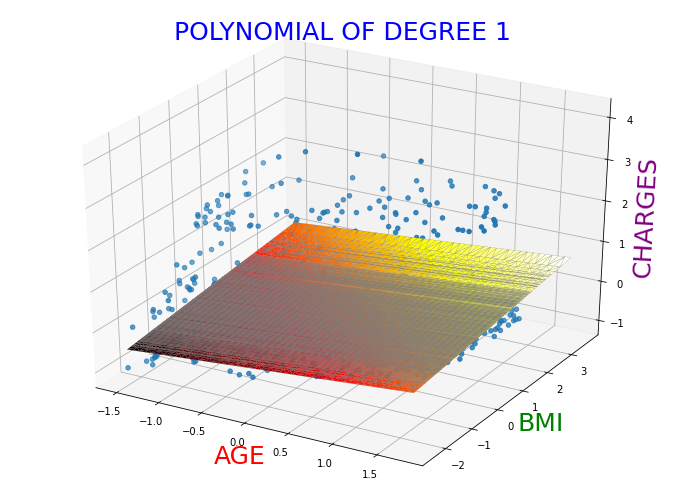

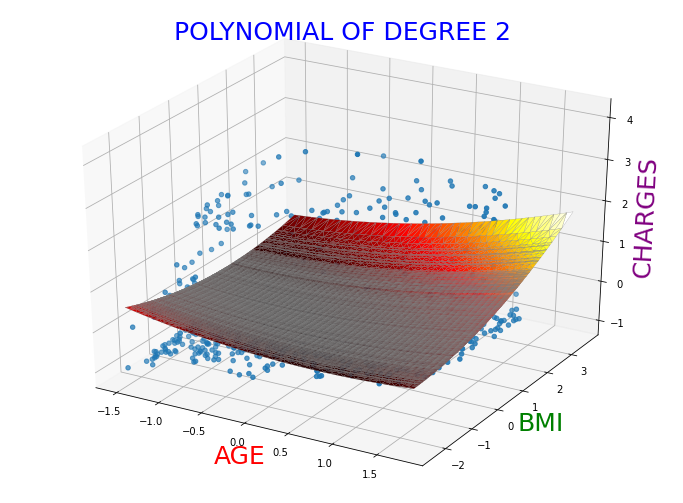

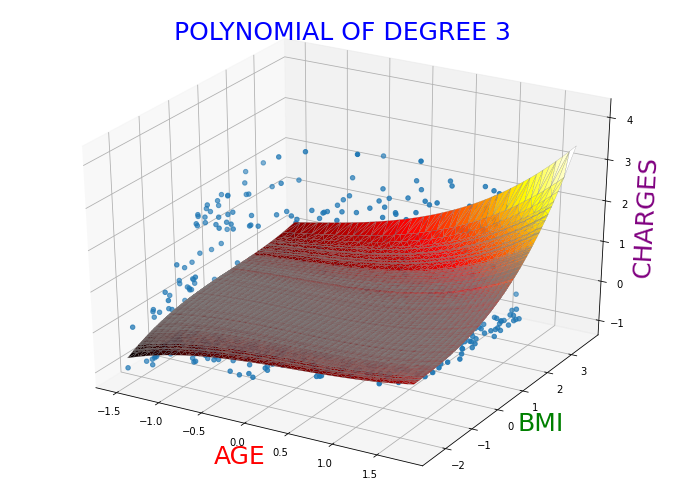

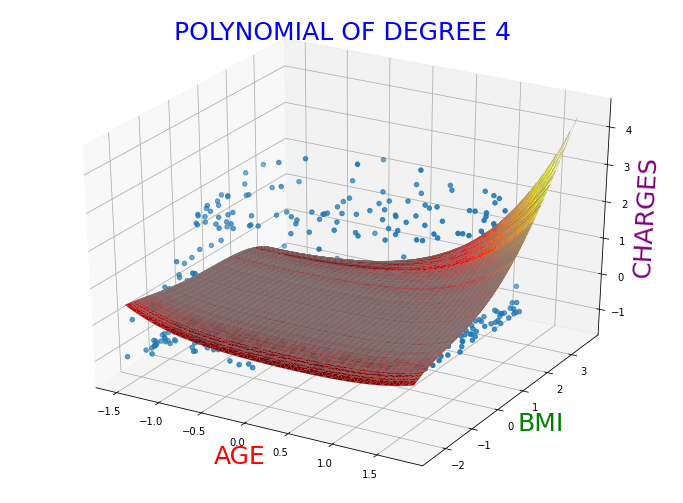

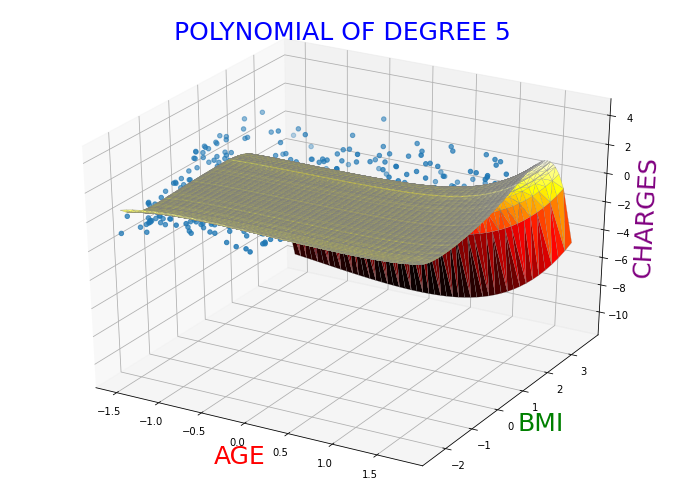

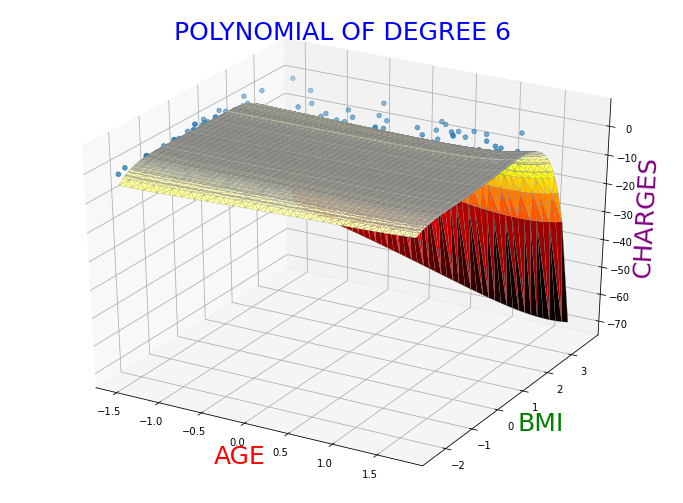

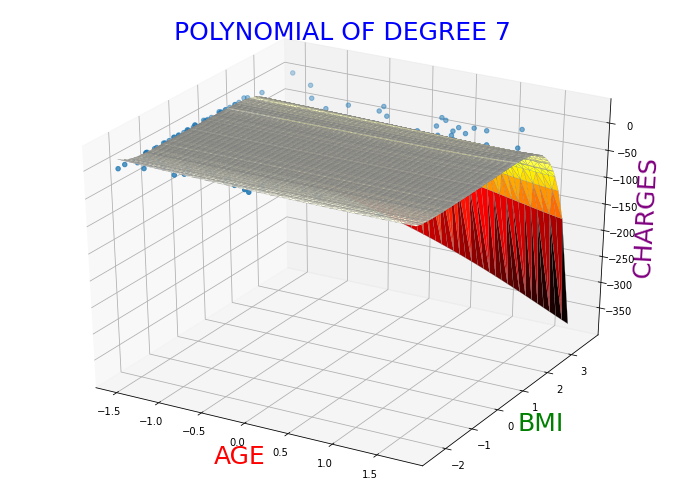

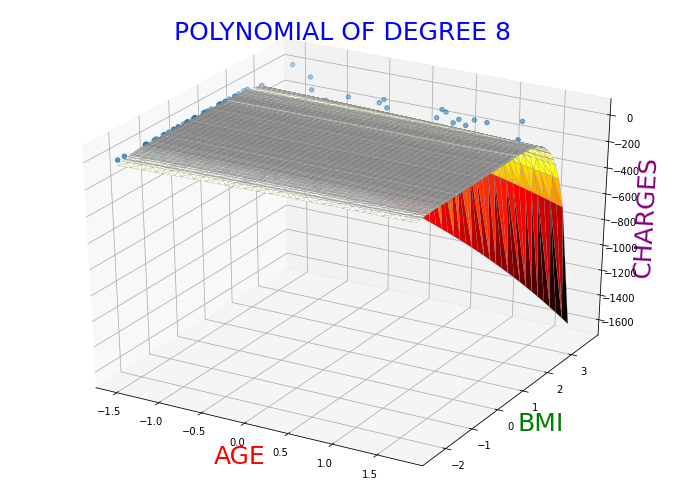

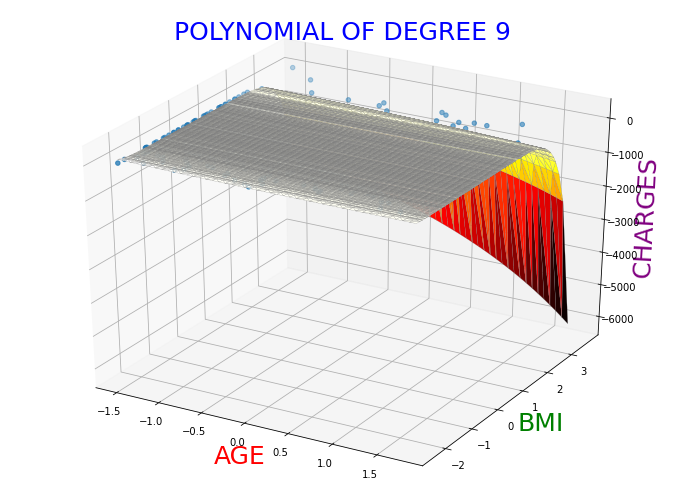

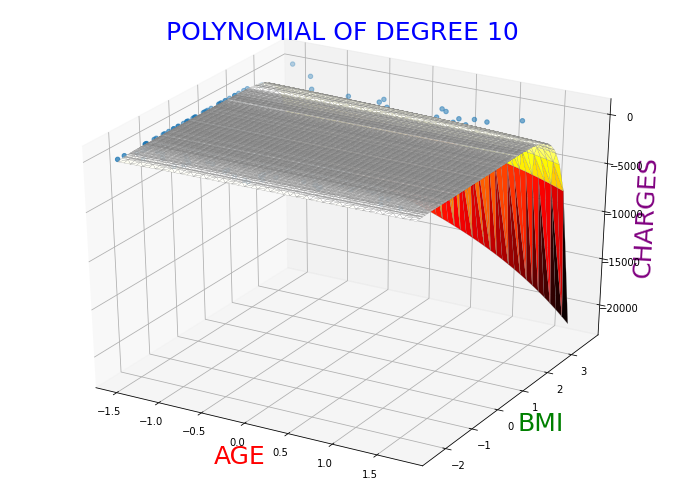

In [ ]:
for i in range(10):
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure(figsize=(12,9))
  ax = fig.add_subplot(111, projection='3d')
  X = X_train[:][:,1]
  Y = X_train[:][:,2]
  X, Y = np.meshgrid(X, Y)
  X = X.flatten()
  Y = Y.flatten()
  matr = np.array(np.vstack((X, Y)).T,dtype = 'float')
  poly = PolynomialFeatures(i+1)
  data = poly.fit_transform(matr)
  z = predict(weight_list_without_reg[i],data)
  ax.set_title('POLYNOMIAL OF DEGREE {}'.format(i+1),fontsize=25, color = "Blue")
  ax.set_xlabel('AGE', fontsize=25, color = "red",y=5)
  ax.set_ylabel('BMI',color = "green",fontsize = 25,y=5)
  ax.set_zlabel('CHARGES', fontsize=25,color = "Purple",y=5)
  my_cmap = plt.get_cmap('hot') 
  ax.scatter(X_train[:][:,1],X_train[:][:,2],y_train, zdir='z', s=20, c=None, depthshade=True,cmap = my_cmap)
  trisurf = ax.plot_trisurf(X.flatten(), Y.flatten(), z.flatten(), cmap = my_cmap,linewidth = 0.2,antialiased = True,edgecolor = 'grey') 
  plt.show()